# MNIST를 활용한 AE 실습

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist=input_data.read_data_sets('data/mnist', one_hot=True)

W0628 09:29:50.682853  5736 deprecation.py:323] From <ipython-input-4-93fe16b9f000>:1: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0628 09:29:50.686853  5736 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0628 09:29:50.687853  5736 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:262: extract_images (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instruc

Extracting data/mnist\train-images-idx3-ubyte.gz


W0628 09:29:51.009871  5736 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0628 09:29:51.018872  5736 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.
W0628 09:29:51.073875  5736 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\tensorflow\contrib\learn\python\learn\datasets\mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecat

Extracting data/mnist\train-labels-idx1-ubyte.gz
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Extracting data/mnist\t10k-labels-idx1-ubyte.gz


In [5]:
learning_rate=0.01
epochs=10
batch_size=1000
n_hidden=128
n_input=28*28

In [6]:
X=tf.placeholder(tf.float32,[None, n_input]) #X값 28*28로, none은 batch size 넣을 수 있게 공간 만들어줌

In [8]:
W_encode=tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode=tf.Variable(tf.random_normal([n_hidden]))

In [9]:
encoder=tf.nn.sigmoid(tf.add(tf.matmul(X,W_encode),b_encode)) #matmul: matrix multifly(행렬 곱하기)

In [10]:
W_decode=tf.Variable(tf.random_normal([n_hidden, n_input])) # 데칼코마니
b_decode=tf.Variable(tf.random_normal([n_input]))

In [11]:
#hypothesis = X' = decoder
decoder=tf.nn.sigmoid(tf.add(tf.matmul(encoder, W_decode),b_decode))

In [13]:
cost=tf.reduce_mean(tf.pow(X-decoder,2))
optimizer=tf.train.AdamOptimizer(learning_rate).minimize(cost)

W0628 10:06:01.392779  5736 deprecation.py:323] From C:\ProgramData\Anaconda3\envs\finance\lib\site-packages\tensorflow\python\ops\math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [15]:
def print_fig(pred, y, sample_size):
    fig, ax=plt.subplots(2, sample_size, figsize=(sample_size, 2))#ax는 축을 가지고 있어

    
    for i in range(sample_size):
        ax[0][i].set_axis_off()
        ax[1][i].set_axis_off()
        ax[0][i].imshow(np.reshape(pred[i],(28,28)))#그림출력
        ax[1][i].imshow(np.reshape(y[i],(28,28)))
        
    plt.show()

Epoch:  1 Avg_cost =  0.1433


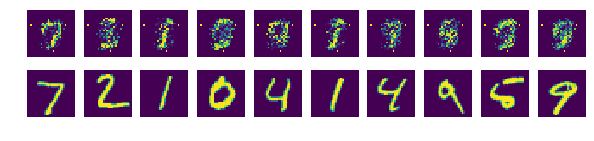

Epoch:  2 Avg_cost =  0.0695


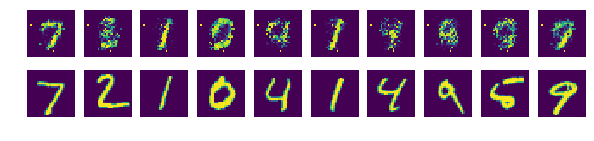

Epoch:  3 Avg_cost =  0.0575


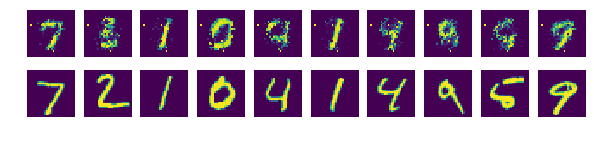

Epoch:  4 Avg_cost =  0.0503


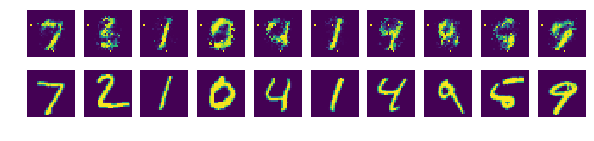

Epoch:  5 Avg_cost =  0.0451


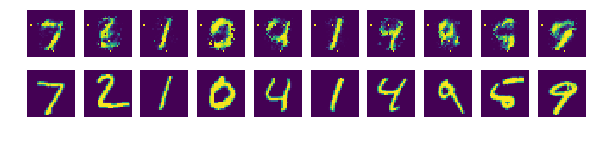

Epoch:  6 Avg_cost =  0.0416


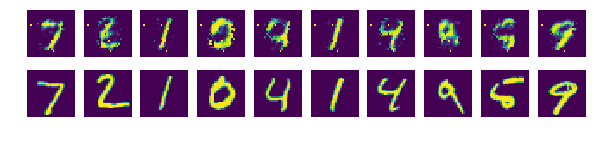

Epoch:  7 Avg_cost =  0.0394


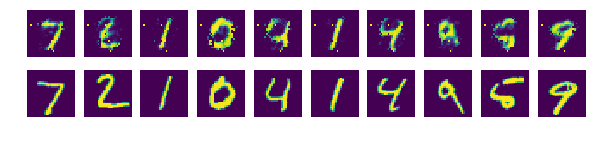

Epoch:  8 Avg_cost =  0.0376


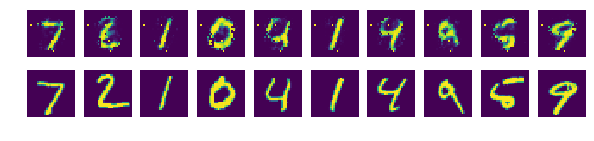

Epoch:  9 Avg_cost =  0.0360


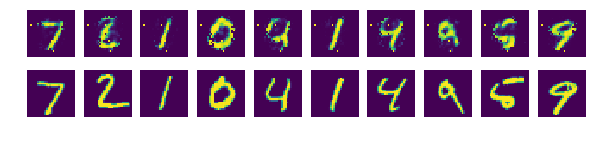

Epoch: 10 Avg_cost =  0.0346


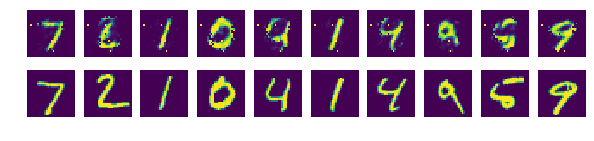

Learning Complete...!


In [20]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
total_batch= int(mnist.train.num_examples/batch_size)

for epoch in range(epochs):
    avg_cost=0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_batch = sess.run([optimizer, cost],
                                feed_dict={X: batch_xs})
        avg_cost += cost_batch/total_batch #배치를 다 돌고 나오면 cost배치의 평균 코스트
        
    print('Epoch:', '%2d' % (epoch + 1), #epoch는 0부터 시작하니+1
          'Avg_cost =', '{: .4f}'.format(avg_cost))
    
    sample_size = 10
    samples=sess.run(decoder, feed_dict={X:mnist.test.images[:sample_size]})
    print_fig(samples, mnist.test.images, sample_size)
    
print('Learning Complete...!')